# World Happiness Report of the world

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.signal

df = pd.read_csv('2019Happiness.csv')

df.columns = ['Rank', 'Country', 'Score', 'GDP', 'SocialSupport', 'HealthyLifeExpectancy', 'Freedom', 'Generosity', 'Corruption']


## Showing initial data and formulating questions.

In [6]:
df.head(20)

,Rank,Country,Score,GDP,SocialSupport,HealthyLifeExpectancy,Freedom,Generosity,Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


## Comparing above countries to the less happy countries.

In [7]:
df.tail(10)

,Rank,Country,Score,GDP,SocialSupport,HealthyLifeExpectancy,Freedom,Generosity,Corruption
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


# Q1: How does the GDP per capita impact someone's overall happiness?

In [19]:
#Highest GDP score is 1.68, lowest being 0
#Defining an average GDP based of a specified range of countries.
def get_average(df_min, df_max):
    total = 0
    for i in range(df_min, df_max):
        total += df.iloc[i]['GDP']
    return total/(df_max - df_min)

top_ten_gdp = get_average(0, 9)
bottom_ten_gdp = get_average(len(df)-10, len(df))

## Let's start by calculating an individual or group of countries' GDP

In [59]:
#This function specifically finds the country with the lowest GDP
def get_country_gdp():
    country = ''
    curr_gdp = 1
    #Determine the range of ranks you want to look into (higher ranks are more happier countries)
    for i in range(0, len(df)):
        #Determine what country had the lowest GDP
        if df.iloc[i]['GDP'] < curr_gdp:
            country = df.iloc[i]['Country']
            curr_gdp = df.iloc[i]['GDP']
            
    return country

print(get_country_gdp())

Somalia


## GDP Vs. Rank

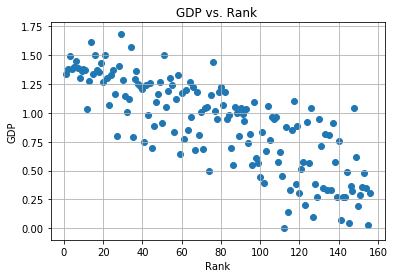

In [4]:
rank = df['Rank']
gdp = df['GDP']
fig, ax = plt.subplots()
ax.scatter(rank, gdp)

ax.set(xlabel='Rank', ylabel='GDP',
       title='GDP vs. Rank ')
ax.grid()
plt.show()

# Overall there is a negative correlation between Rank and GDP. The average GDP was 0.905, highest country with 1.68 being Qatar and the lowest at 0.0 being Somalia.

# Q2: Is there a correlation between someone's perceived freedom vs. their feelings on corruption in their country?

## We obtain a value from -1 to 1 based on Pearson Corrleation.

In [43]:
#Pearson correlation
def corr_between(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = sum([((i-x_mean)*(j-y_mean)) for i,j in zip(x,y)])
    den1 = sum([((i-x_mean)**2) for i in x])
    den2 = sum([((j-y_mean)**2) for j in y])
    den = np.sqrt(den1) * np.sqrt(den2)
    
    return num/den

freedom = df['Freedom']
corruption = df['Corruption']

print(f'The correlation between perceived freedom and corruption is {corr_between(freedom, corruption)}')


The correlation between perceived freedom and corruption is 0.43884330641506714


# The correlation between perceived freedom and corruption returned 0.439 showing that if you feel less free in your country, you are more likely to think the government is corrupt.

# Q3: Is generosity an indicator of overall happiness?

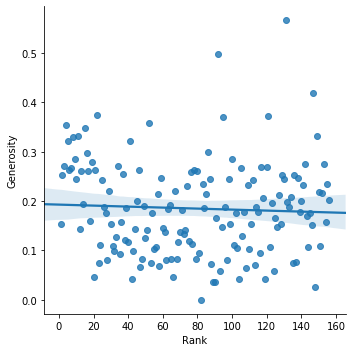

In [17]:
sns.lmplot(x="Rank", y="Generosity", data=df);

# As you can see there is absolutely no correlation between a country's overall happiness and the generosity of people.

# Q4: How does someone's Life Expectancy compare to their overall amount of Social Support?

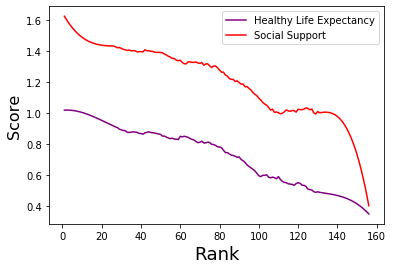

In [32]:
x = df['Rank']
y = df['HealthyLifeExpectancy']
y2 = df['SocialSupport']
#Smoothing Data
yhat = scipy.signal.savgol_filter(y, 51, 3) # window size 51, polynomial order 3
yhat2 = scipy.signal.savgol_filter(y2, 51, 3)

plt.plot(x, yhat, color='purple', label='Healthy Life Expectancy')
plt.plot(x, yhat2, color='red', label='Social Support')
plt.legend()
plt.xlabel('Rank', fontsize=18)
plt.ylabel('Score', fontsize=16)
plt.show()

# Both Life Expectancy and Social Support drop off in the lower countries, especially one's perception of their social support.

# Q5: In the top 20% of the most happiest countries, which ones are from Europe?

In [33]:
df.head(30)

,Rank,Country,Score,GDP,SocialSupport,HealthyLifeExpectancy,Freedom,Generosity,Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


## We first need to obtain a list of all the European Countries

In [48]:
eu_countries = ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium","Bosnia and Herzegovina",
                "Bulgaria", "Croatia", "Cyprus","Czech Republic", "Denmark", "Estonia" , "Finland", "France", "Georgia", 
                "Germany", "Greece" ,"Hungary", "Iceland", "Ireland", "Italy", "Kosovo" ,"Latvia", "Liechtenstein", 
                "Lithuania", "Luxembourg", "Macedonia", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", 
                "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia",
                "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "Vatican City"]
    
def get_european(max):
    europe = []
    #20% equivalates to 30 countries
    for i in range(0, max):
        #Determine if the country is from europe
        if df.iloc[i]['Country'] in eu_countries:
            europe.append(df.iloc[i]['Country'])
            
    return europe

In [53]:
print(get_european(29))
print(len(get_european(29)))

['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'Austria', 'Luxembourg', 'Ireland', 'Germany', 'Belgium', 'Czech Republic', 'Malta', 'France']
15


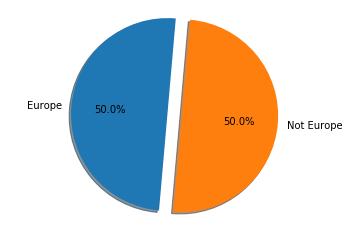

In [50]:
labels = ['Europe', 'Not Europe']
sizes = [len(get_european(29)), (30 - len(get_european(29)))]
explode = (0.15, 0)  # explodes out the first pie piece

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=85)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# We see that a 50% ratio of Europe to Non-European countries in the top 20%! Let's see what the top 10% looks like.

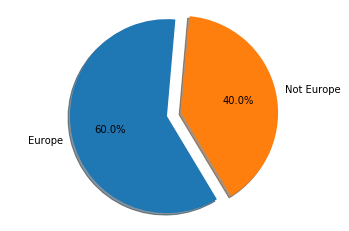

In [55]:
labels = ['Europe', 'Not Europe']
sizes = [len(get_european(14)), (15 - len(get_european(14)))]
explode = (0.15, 0)  # explodes out the first pie piece

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=85)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## It increased to 60% totalling 9/15 of the top happiest countries.

# Summary:
## Q1: Overall there is a negative correlation between Rank and GDP. The average GDP was 0.905, highest country with 1.68 being Qatar and the lowest at 0.0 being Somalia.
## Q2: The correlation between perceived freedom and corruption returned 0.439 showing that if you feel less free in your country, you are more likely to think the government is corrupt.
## Q3: There is absolutely no correlation between a country's overall happiness and the generosity of people.
## Q4: Both Life Expectancy and Social Support drop off in the lower countries, especially someone's perception of their social support.
## Q5: We see that there is a 50% ratio of Europe to Non-European countries in the top 20%! 


# Overall this dataset provided a good understanding of what factors in to someone's happiness in their country. This dataset was also not the most clear as to what the numbers mean, and tended to be on an abritrary scale making it difficult to do other calculations with the data.